In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
df_true = pd.read_csv("True.csv")
df_true["Label"] = 1
df_fake = pd.read_csv("Fake.csv")
df_fake["Label"] = 0
df_all = pd.concat([df_true,df_fake],axis=0)

In [5]:
df_all = df_all.sample(frac=1).reset_index(drop=True)

In [22]:
X = df_all["title"] + " " + df_all["text"]
y = df_all.Label
y = y[:5000]
X = X[:5000]
print(len(X))
X[78]

5000


'Trump Middle East envoy meets Netanyahu in Jerusalem JERUSALEM (Reuters) - U.S. President Donald Trump’s Middle East envoy and Israeli Prime Minister Benjamin Netanyahu met on Monday, Netanyahu’s office said, as the new administration tries to restart peace talks with the Palestinians. A statement from the Israeli leader’s office said Jason Greenblatt “reaffirmed President Trump’s commitment to Israel’s security and to the effort to help Israelis and Palestinians achieve a lasting peace through direct negotiations.” Peace talks between Israel and the Palestinians have been frozen since 2014 and the Palestinians have been concerned at the more favorable approach shown by Washington toward Netanyahu since Trump came to office in January. The statement added that during a conversation lasting more than five hours, Netanyahu and Greenblatt discussed Israel’s settlement building “with the hope of reaching a formula that will aim to promote peace and security.”  One of the most heated issue

In [23]:
num_word = 10000
max_len= 500
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_word+1)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_X = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=500, padding="post", truncating="post")

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(padded_X,np.array(y),test_size=0.2)

In [31]:
model = keras.Sequential([keras.layers.Embedding(num_word+1,16,input_length=500),
                         keras.layers.Bidirectional(keras.layers.LSTM(64)),
                        keras.layers.Dense(16,activation="relu"),
                        keras.layers.Dense(1,activation="sigmoid")
                         ])

In [32]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [34]:
history_all = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
125/125 [==============================] - 54s 432ms/step - loss: 0.1804 - accuracy: 0.9523 - val_loss: 0.0492 - val_accuracy: 0.9840
Epoch 2/5
125/125 [==============================] - 48s 387ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0211 - val_accuracy: 0.9930
Epoch 3/5
125/125 [==============================] - 47s 378ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0183 - val_accuracy: 0.9920
Epoch 4/5
125/125 [==============================] - 46s 365ms/step - loss: 3.2994e-04 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9940
Epoch 5/5
125/125 [==============================] - 52s 419ms/step - loss: 1.8013e-04 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9930


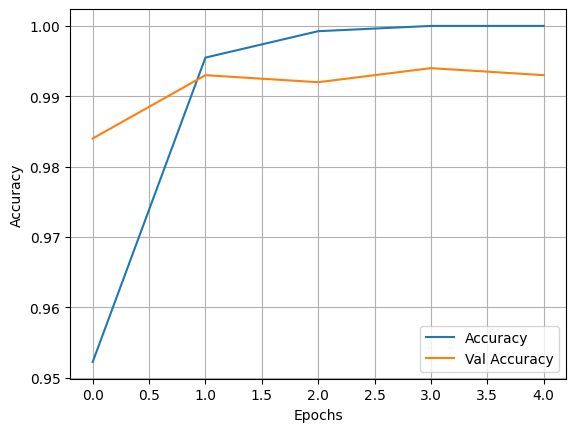

In [35]:
history_all = pd.DataFrame(history_all.history)
plt.plot(history_all.accuracy,label="Accuracy")
plt.plot(history_all.val_accuracy,label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

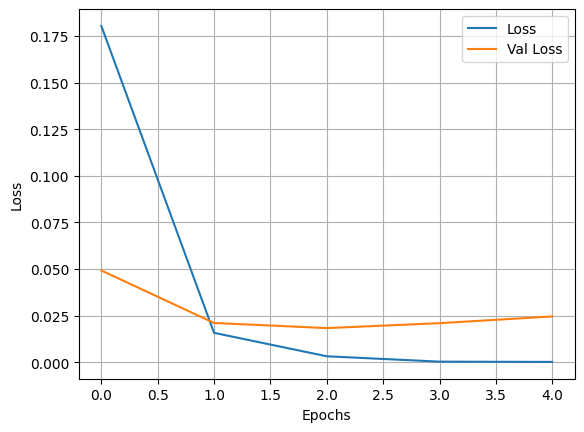

In [36]:
plt.plot(history_all.loss,label="Loss")
plt.plot(history_all.val_loss,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [53]:
def predict_title(sentence,model):
    sentence_seq = tokenizer.texts_to_sequences(sentence)
    sentence_pad = keras.preprocessing.sequence.pad_sequences(sentence_seq,maxlen=max_len, padding="post", truncating="post")
    prediction = model.predict(sentence_pad)
    if prediction > 0.5:
        predict = 1
    else:
        predict = 0
    return predict

In [43]:
X[57]

'Clinton leads Trump by 3 percentage points: Bloomberg/Selzer poll (Reuters) - U.S. Democratic presidential candidate Hillary Clinton holds a three-point lead over Republican Donald Trump in the final Bloomberg Politics-Selzer & Co poll released on Monday. The poll showed Clinton leading Trump by 44 percent to 41 percent. Libertarian Gary Johnson was at 4 percent and Green Party Candidate Jill Stein was at 2 percent. '

In [44]:
predict_title(["At least 19 drown when boat capsizes in northern India: police NEW DELHI (Reuters) - At least 19 people drowned and 10 are missing after a boat capsized in the Yamuna river in northern Indian on Thursday, a police officer said. The boat capsized on Thursday morning while farmers were being ferried to their farmlands. Dharavath Pradeep Kumar, a senior police officer who was leading rescue operations, said the boat was carrying 40 people, many more than its capacity of 25. It capsized not far from the river bank in Katha village in northern Uttar Pradesh state, 45 km (30 miles) north of the capital, New Delhi.  Eleven people were rescued and were admitted to a  government hospital, he said. Kumar said police were investigating the boat operator"],model)

1/1 [==============================] - 0s 148ms/step


1

In [46]:
y_pred = []
p = 0
for i in X_train:
    p+=1
    print(p,"/",len(X_train))
    a = predict_title([i],model)
    y_pred.append(a)

1 / 4000
1/1 [==============================] - 0s 176ms/step
2 / 4000
1/1 [==============================] - 0s 221ms/step
3 / 4000
1/1 [==============================] - 0s 333ms/step
4 / 4000
1/1 [==============================] - 0s 81ms/step
5 / 4000
1/1 [==============================] - 0s 98ms/step
6 / 4000
1/1 [==============================] - 0s 151ms/step
7 / 4000
1/1 [==============================] - 0s 214ms/step
8 / 4000
1/1 [==============================] - 0s 290ms/step
9 / 4000
1/1 [==============================] - 0s 294ms/step
10 / 4000
1/1 [==============================] - 0s 92ms/step
11 / 4000
1/1 [==============================] - 0s 105ms/step
12 / 4000
1/1 [==============================] - 0s 84ms/step
13 / 4000
1/1 [==============================] - 0s 75ms/step
14 / 4000
1/1 [==============================] - 0s 91ms/step
15 / 4000
1/1 [==============================] - 0s 83ms/step
16 / 4000
1/1 [==============================] - 0s 126ms/step
17 / 400

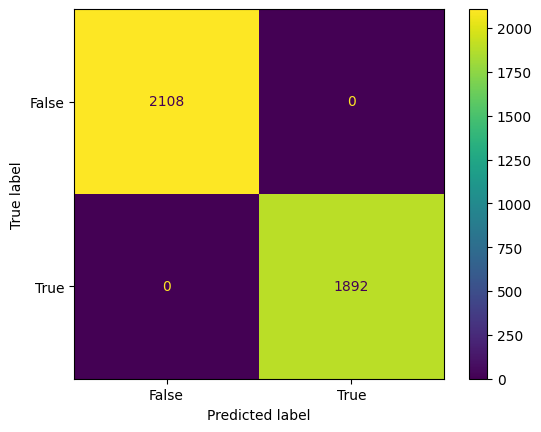

In [47]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [48]:
y_pred2 = []
p = 0
for i in X_val:
    p += 1
    print(p,"/",len(X_val))
    a = predict_title([i],model)
    y_pred2.append(a)

1 / 1000
1/1 [==============================] - 0s 313ms/step
2 / 1000
1/1 [==============================] - 0s 329ms/step
3 / 1000
1/1 [==============================] - 0s 175ms/step
4 / 1000
1/1 [==============================] - 0s 253ms/step
5 / 1000
1/1 [==============================] - 0s 126ms/step
6 / 1000
1/1 [==============================] - 0s 93ms/step
7 / 1000
1/1 [==============================] - 0s 84ms/step
8 / 1000
1/1 [==============================] - 0s 286ms/step
9 / 1000
1/1 [==============================] - 0s 118ms/step
10 / 1000
1/1 [==============================] - 0s 119ms/step
11 / 1000
1/1 [==============================] - 0s 136ms/step
12 / 1000
1/1 [==============================] - 0s 253ms/step
13 / 1000
1/1 [==============================] - 0s 131ms/step
14 / 1000
1/1 [==============================] - 0s 123ms/step
15 / 1000
1/1 [==============================] - 0s 145ms/step
16 / 1000
1/1 [==============================] - 0s 203ms/step
17 

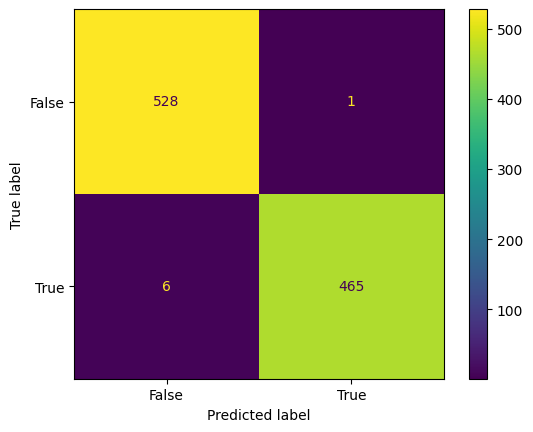

In [50]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [51]:
X[10]

"Trump backers sue San Jose for allowing 'mob' assault (Reuters) - Police in the California city of San Jose, motivated by the political leanings of city officials, allowed an angry mob to assault Donald Trump supporters as they left a rally for the presumptive Republican presidential candidate last month, a lawsuit filed on Thursday alleges. The civil lawsuit, filed by 14 Trump supporters against the city of San Jose, its mayor, police chief and a number of other individuals, says police funneled Trump supporters outside the city’s convention center directly into a crowd of hundreds of “physically violent and aggressive” protesters. The plaintiffs add that city officials directed roughly 250 San Jose police officers not to intervene amid a melee of “violent criminal acts perpetrated by dozens of anti-Trump protesters.” The San Jose City Attorney, Richard Doyle, said he had not yet read the complaint, but that police made many arrests and the city is “committed to first amendment right

In [54]:
predict_title(["'Obama says must change the way nation manages fossil fuel resources WASHINGTON (Reuters) - President Barack Obama on Tuesday said he would seek changes in the way U.S. oil and coal resources are managed, prompting a flood of reaction from environmental groups pushing him to do more to limit fossil fuel production - and producers anxious about regulatory changes. “I’m going to push to change the way we manage our oil and coal resources, so that they better reflect the costs they impose on taxpayers and our planet,” Obama said in his State of the Union address. As he enters his final year in office, Obama is looking to secure his legacy on priorities like curbing climate change. The White House did not provide details on Tuesday. “That’s an issue I would say, stay tuned for the months ahead,” White House Communications Director Jen Psaki told reporters during a briefing ahead of the speech. “This is not a speech where I would expect a 25-page fact-sheet. This is more talking about his vision and the issues we need to address,” Psaki said. The Western Energy Alliance, a group that represents oil and natural gas companies that drill on public lands in the western states, said it suspected the lack of immediate details meant that Obama would look for ways to act without Congress. “He’ll close out his term by continuing to issue new rules through the federal agencies that kill jobs and economic growth in order to promote his climate change agenda,” said Tim Wigley, the group’s president, in a statement. Environmental groups noted Obama’s pledge comes as his administration works on a new five-year plan for offshore oil and gas leases. They are also calling for changes to rules for production of oil and gas on federal lands. “For far too long, the Interior Department has given away our publicly owned fossil fuels to mining and drilling companies without regard for the damage they cause to communities and our climate,” said Annie Leonard, executive director of Greenpeace USA, in a statement."],model)

1/1 [==============================] - 0s 101ms/step


1

In [55]:
model.evaluate(X_val,y_val)

32/32 [==============================] - 4s 116ms/step - loss: 0.0246 - accuracy: 0.9930


[0.02457270398736, 0.9929999709129333]

In [56]:
model.evaluate(X_train,y_train)

125/125 [==============================] - 15s 116ms/step - loss: 1.3567e-04 - accuracy: 1.0000


[0.00013567472342401743, 1.0]

In [50]:
model.save("model2.keras")

import pickle 
with open('tokenizer2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)